# Departamento de Processamento de Linguagem Natural

 A partir de uma base de dados textual, classificar o sentimento do cliente em relação a um determinado produto

### Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importação da Base de Dados

In [2]:
base = pd.read_csv('amazon_alexa.tsv',sep = '\t' )

In [3]:
# Formato da base
base.shape

(3150, 5)

In [4]:
# Visualização da base
base.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
# Informações 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
# Estatísticas
base.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


### Análise Exploratória dos Dados

In [7]:
# Verificando nulos
base.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

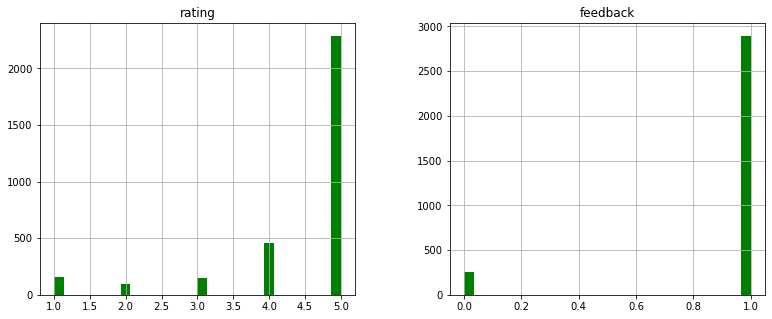

In [9]:
# Histograma
base.hist(bins = 30, figsize =(13,5), color = 'g');

In [10]:
# Análise parte escrita (aplica pra cada review, o tamanho da frase)
base['length'] = base['verified_reviews'].apply(len)
base.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


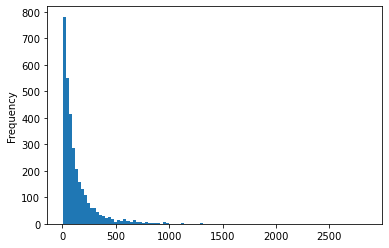

In [12]:
# Histograma para os reviews
base['length'].plot(bins = 100, kind = 'hist')

In [13]:
# Estatísticas
base.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [19]:
# Checando o valor maximo
base[base['length'] == 2851.000000]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [17]:
# Checando o valor minimo
base[base['length'] == 1.000000]

,rating,date,variation,verified_reviews,feedback,length
60,5,30-Jul-18,Heather Gray Fabric,😍,1,1
85,5,30-Jul-18,Heather Gray Fabric,,1,1
183,3,29-Jul-18,Heather Gray Fabric,,1,1
219,5,29-Jul-18,Sandstone Fabric,,1,1
374,1,26-Jul-18,Black,,0,1
...,...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1,1
3120,5,30-Jul-18,Black Dot,,1,1
3123,4,30-Jul-18,Black Dot,,1,1
3126,5,30-Jul-18,Black Dot,,1,1


In [20]:
# Dividindo por feedback
positivo = base[base['feedback'] == 1]
positivo.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [22]:
#Estatística positiva
positivo.describe()

,rating,feedback,length
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


In [21]:
negativo = base[base['feedback'] == 0]
negativo.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [23]:
# Estatística negativa
negativo.describe()

,rating,feedback,length
count,257.000000,257.0,257.000000
mean,1.373541,0.0,215.241245
std,0.484688,0.0,236.325955
min,1.000000,0.0,1.000000
25%,1.000000,0.0,53.000000
50%,1.000000,0.0,137.000000
75%,2.000000,0.0,289.000000
max,2.000000,0.0,1686.000000


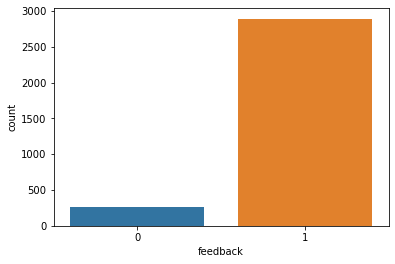

In [24]:
# Gráfico de barras feedback
sns.countplot(base['feedback'])

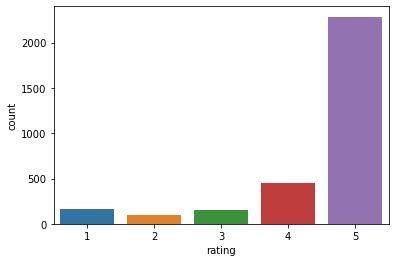

In [25]:
# Gráfico de barras rating
sns.countplot(x = 'rating', data = base);

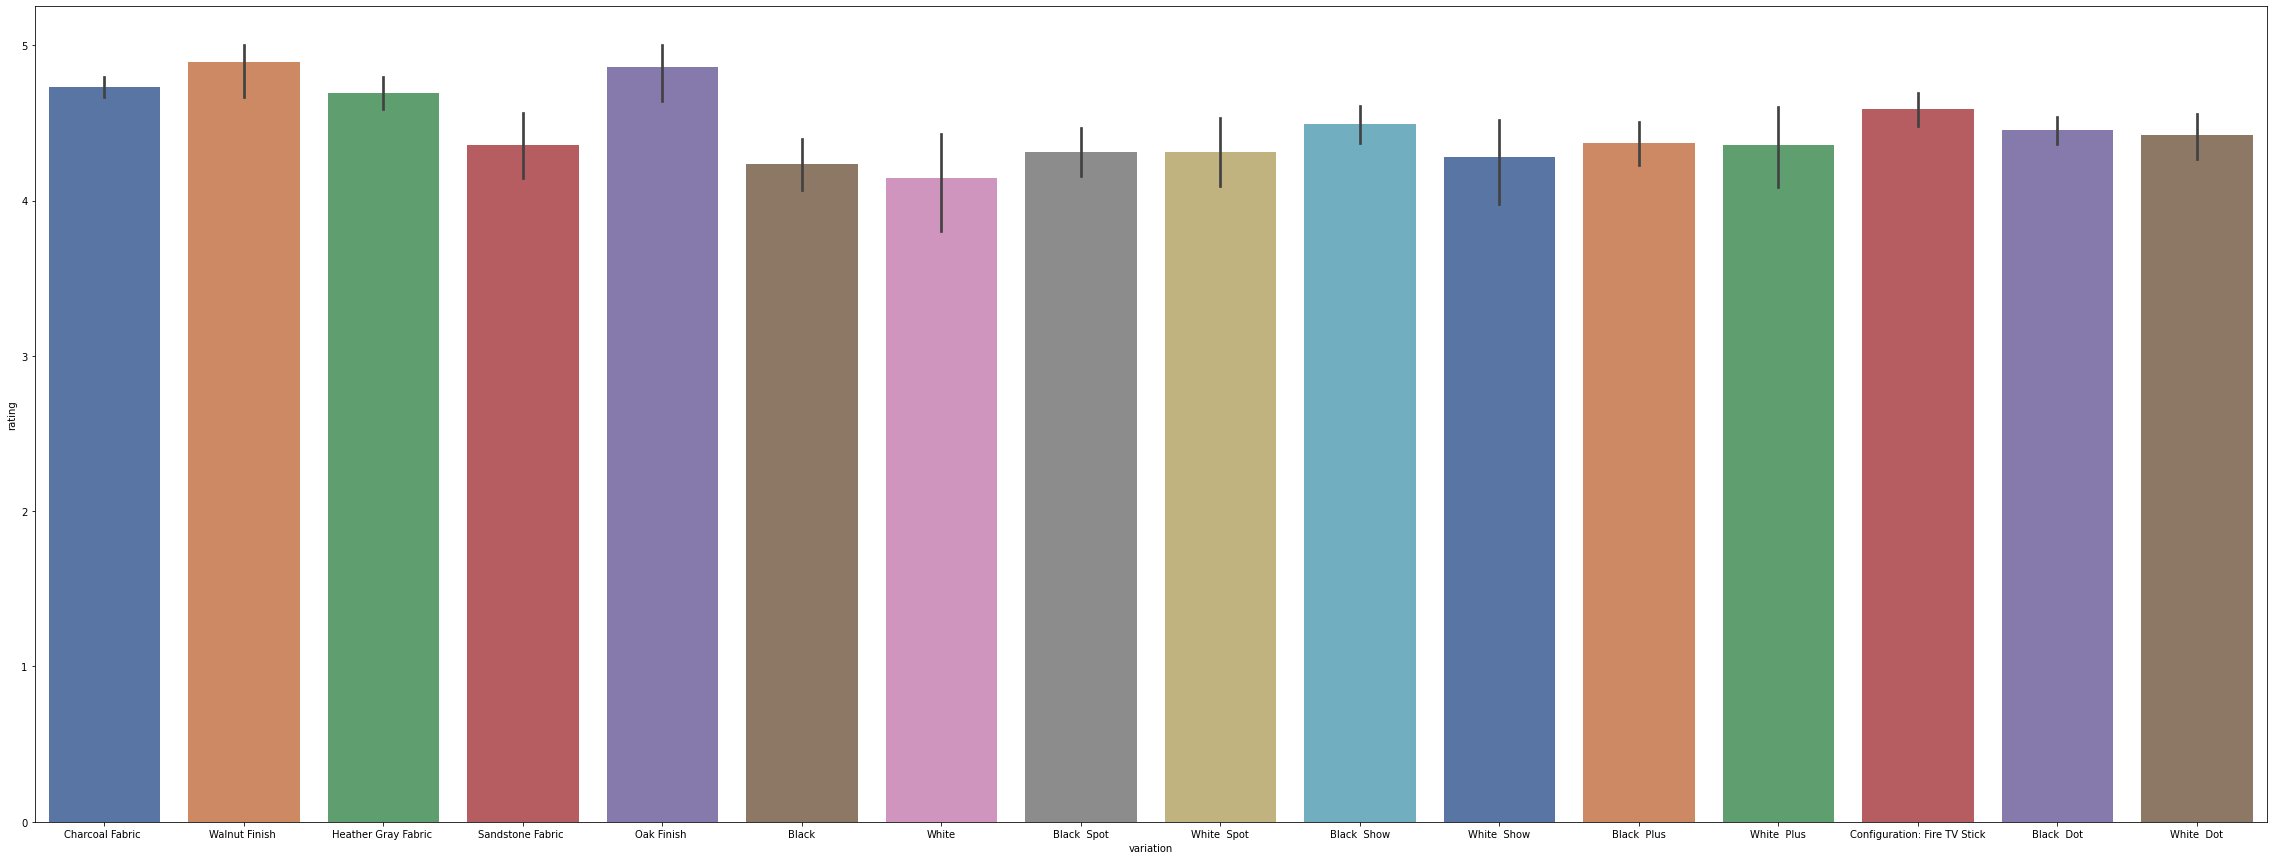

In [26]:
# Gráfico de rating por categoria
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y = 'rating', data = base, palette = 'deep');

In [27]:
# Separando as frases
frases = base['verified_reviews'].tolist()

In [28]:
# Printando os 10 primeiros
print(frases[0:10])

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

In [30]:
# Coloca tudo em uma única string e separa por um espaço
frases_string = ' '.join(frases)

In [31]:
# Quantidade de caracteres total
print("Total de caracteres: ", len(frases_string))

Total de caracteres:  419105


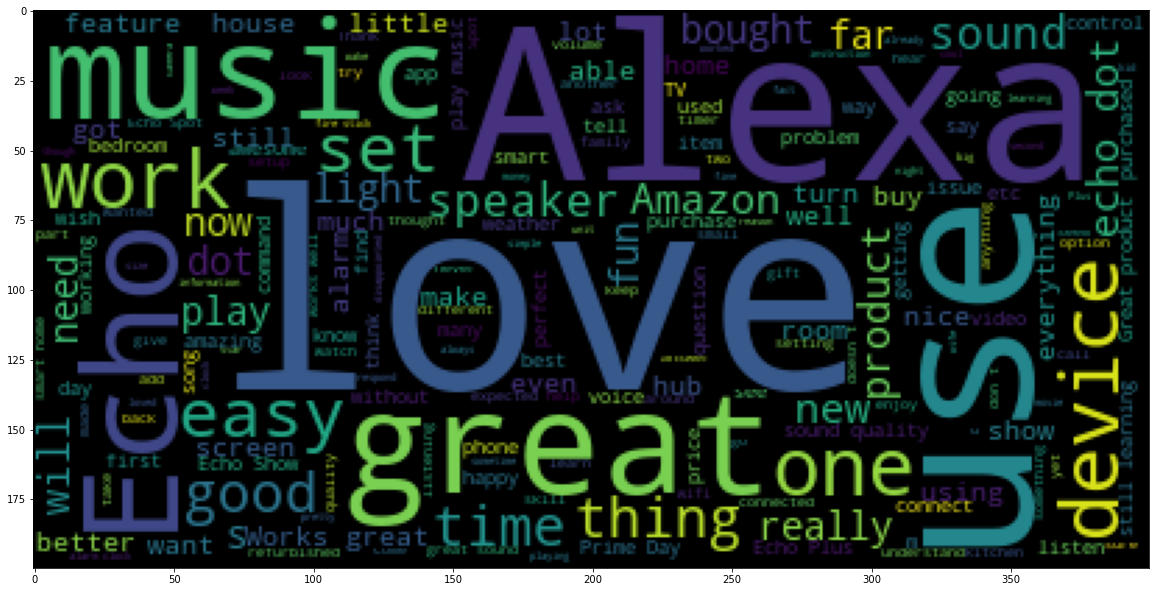

In [34]:
# Gerando uma nuvem de palavras com as mais comuns
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(frases_string))

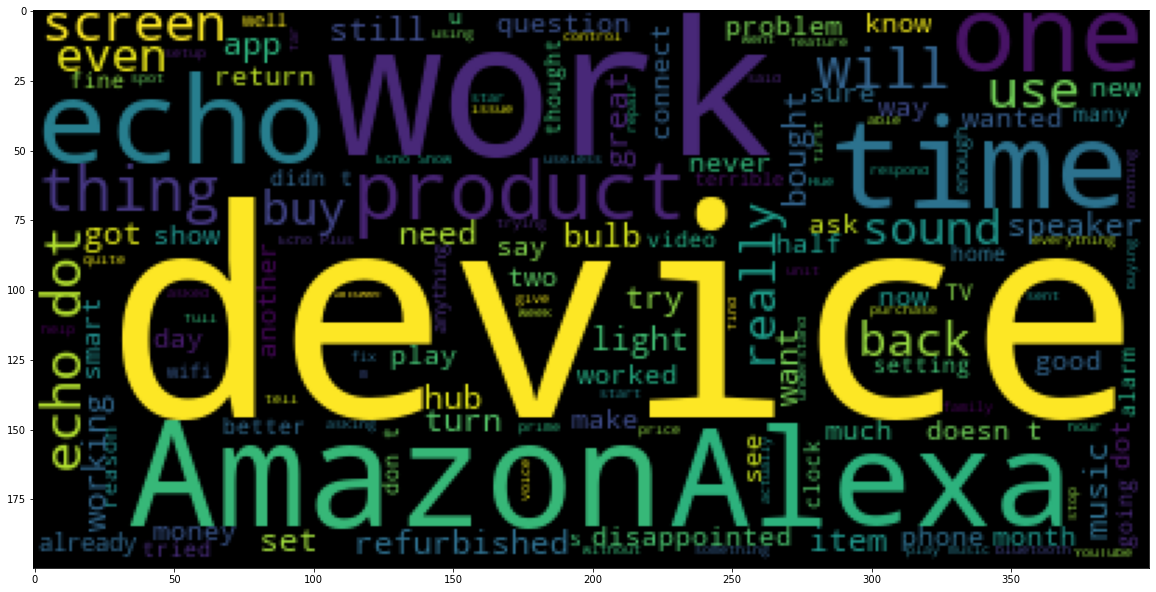

In [35]:
# Fazendo o mesmo para as negativas 
lista_negativa = negativo['verified_reviews'].tolist()
negativo_string = ' '.join(lista_negativa)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negativo_string));

### Limpeza 

In [36]:
# Remoção de colunas
base = base.drop(['date', 'rating', 'length'], axis = 1)

In [37]:
# Visualização 
base.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [39]:
# One Hot Encoding
X_cat = base[['variation']]

from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
X_cat = onehot.fit_transform(X_cat).toarray()

In [40]:
# Concatenando
X_cat = pd.DataFrame(X_cat)
base.drop(['variation'], axis = 1, inplace = True)
base = pd.concat([base, X_cat], axis = 1)

### Removendo Pontuação (Teste)

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
teste = 'Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, information! It’s great!'

In [54]:
teste_spont = [char for char in teste if char not in string.punctuation]
teste_spont

['L',
 'o',
 'v',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'I',
 '’',
 'v',
 'e',
 ' ',
 'l',
 'i',
 's',
 't',
 'e',
 'n',
 'e',
 'd',
 ' ',
 't',
 'o',
 ' ',
 's',
 'o',
 'n',
 'g',
 's',
 ' ',
 'I',
 ' ',
 'h',
 'a',
 'v',
 'e',
 'n',
 '’',
 't',
 ' ',
 'h',
 'e',
 'a',
 'r',
 'd',
 ' ',
 's',
 'i',
 'n',
 'c',
 'e',
 ' ',
 'c',
 'h',
 'i',
 'l',
 'd',
 'h',
 'o',
 'o',
 'd',
 ' ',
 'I',
 ' ',
 'g',
 'e',
 't',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'n',
 'e',
 'w',
 's',
 ' ',
 'w',
 'e',
 'a',
 't',
 'h',
 'e',
 'r',
 ' ',
 'i',
 'n',
 'f',
 'o',
 'r',
 'm',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'I',
 't',
 '’',
 's',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't']

In [55]:
teste_spont = ''.join(teste_spont)
teste_spont

'Love it I’ve listened to songs I haven’t heard since childhood I get the news weather information It’s great'

### Remoção de Stop Words (teste)

In [57]:
import nltk

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [59]:
# Palavras sem sentido para classificação 
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [61]:
# Removendo stop words
teste_spont_stop = [word for word in teste_spont.split() if word.lower() not in stopwords.words('english')]

In [62]:
teste_spont_stop

['Love',
 'I’ve',
 'listened',
 'songs',
 'haven’t',
 'heard',
 'since',
 'childhood',
 'get',
 'news',
 'weather',
 'information',
 'It’s',
 'great']

### Tokenização e Count Vectorizer (teste)

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
teste_texto = ['This is the first document.', 'This document is the second document.',
              'And this is the third one.', 'Is this the first document?']

In [65]:
# Contando e vetorizando
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(teste_texto)

In [66]:
# Palavras unicas
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [67]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### Aplicando na base de dados

In [68]:
# Função para limpeza
def limpeza_mensagem(mensagem):
    texto = [char for char in mensagem if char not in string.punctuation]
    texto = ''.join(texto)
    texto = [word for word in texto.split() if word.lower() not in stopwords.words('english')]
    return texto

In [69]:
# Aplicando a função de limpeza
base_limpa = base['verified_reviews'].apply(limpeza_mensagem)

In [70]:
# Vetorizando e limpando ao mesmo tempo
vectorizer = CountVectorizer(analyzer = limpeza_mensagem)
base_vetorizada = vectorizer.fit_transform(base['verified_reviews'])

In [71]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [72]:
# Apagando pois ja foi processado
base.drop(['verified_reviews'], axis = 1,inplace = True)

In [73]:
# Concatenando
reviews = pd.DataFrame(base_vetorizada.toarray())
base = pd.concat([base, reviews], axis = 1)

In [74]:
# Verificando o formato
base.shape

(3150, 5228)

In [75]:
# Separando em previsores e classes
X = base.drop(['feedback'], axis = 1)
y = base['feedback']

### Naive Bayes

* Algoritmo Simples baseado em probabilidade
* Baseia-se no Teorema de Bayes

      1. Probabilidade a Priori de pertencer a 1 ou a 2:

        Número de registros da classe 1/ Número total de registros.
        Número de registros da classe 2/ Número total de registros.
    
    
      2. Likelihood (raio em volta do registro)
  
        Número de registros da classe 1 na vizinhança/ Número total de registros da classe 1.
        Número de registros da classe 2 na vizinhança/ Número total de registros da classe 2.
    
     
      3. Probabilidade a Posteriori
  
        Prob.Priori classe 1 * Likelihood classe 1
        Prob.Priori classe 2 * Likelihood classe 2
    
    
* Probabilidade a Posteriori maior ganha!
     
    

In [78]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split (X, y, test_size = 0.2)

In [79]:
# Formatos
X_treino.shape, X_teste.shape

((2520, 5227), (630, 5227))

In [81]:
from sklearn.naive_bayes import MultinomialNB

In [83]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_treino, y_treino)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Avaliação

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [85]:
pred = naive_bayes.predict(X_teste)

In [86]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [87]:
accuracy_score(y_teste, pred)

0.9476190476190476

In [88]:
cm = confusion_matrix (y_teste, pred)
cm

array([[ 10,  27],
       [  6, 587]], dtype=int64)

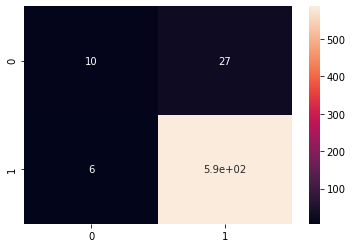

In [89]:
sns.heatmap(cm, annot = True)

In [90]:
print(classification_report(y_teste, pred))

              precision    recall  f1-score   support

           0       0.62      0.27      0.38        37
           1       0.96      0.99      0.97       593

    accuracy                           0.95       630
   macro avg       0.79      0.63      0.68       630
weighted avg       0.94      0.95      0.94       630



### Regressão Logística

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
modelo = LogisticRegression()
modelo.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
pred = modelo.predict(X_teste)

In [94]:
accuracy_score(y_teste, pred)

0.9507936507936507

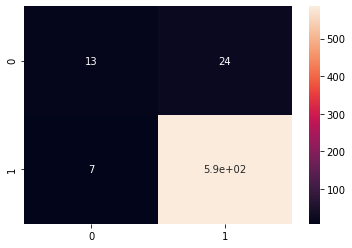

In [96]:
cm = confusion_matrix(y_teste, pred)
sns.heatmap(cm, annot = True)

In [95]:
print(classification_report(y_teste, pred))

              precision    recall  f1-score   support

           0       0.65      0.35      0.46        37
           1       0.96      0.99      0.97       593

    accuracy                           0.95       630
   macro avg       0.81      0.67      0.72       630
weighted avg       0.94      0.95      0.94       630



### Classificação de somente uma frase

In [97]:
import pickle 

In [100]:
with open('classificador_texto.pkl', 'wb') as f:
    pickle.dump([naive_bayes, onehot, vectorizer], f)

In [101]:
with open('classificador_texto.pkl', 'rb') as f:
    bayes, one, vec = pickle.load(f)

In [102]:
bayes, one, vec

(MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
 OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
               handle_unknown='error', sparse=True),
 CountVectorizer(analyzer=<function limpeza_mensagem at 0x00000169F6FAED90>,
                 binary=False, decode_error='strict',
                 dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                 lowercase=True, max_df=1.0, max_features=None, min_df=1,
                 ngram_range=(1, 1), preprocessor=None, stop_words=None,
                 strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                 tokenizer=None, vocabulary=None))

In [103]:
negativo.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [104]:
texto_negativo = negativo.iloc[0:1, [2,3]]
texto_negativo

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [106]:
X_cat = texto_negativo[['variation']]
X_cat

,variation
46,Charcoal Fabric


In [110]:
X_cat = one.transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)

In [112]:
X_cat.index = texto_negativo.index

In [113]:
neg_df = pd.concat([texto_negativo, X_cat], axis = 1)

In [114]:
neg_df.drop(['variation'], axis = 1, inplace= True)

In [115]:
negat_vec = vec.transform(neg_df['verified_reviews'])

In [117]:
neg_df.drop(['verified_reviews'], axis = 1, inplace = True)

In [118]:
review = pd.DataFrame(negat_vec.toarray())

In [119]:
neg_df.index = review.index

In [120]:
negativo_final = pd.concat([neg_df,review], axis = 1)

In [121]:
bayes.predict(negativo_final)

array([1], dtype=int64)